##                              POWER BI DASHBOARD CAPSTONE PROJECT

### BUSINESS UNDERSTANDING

You are assigned a client by getINNOtized to design and deliver an end-to-end business  intelligence solution. Your client has collected transactional data for the year 2019 but hasn’t been able to  put it to good use. The client hopes you can analyze the data and put together a report  to help them find opportunities to drive more sales and work more efficiently. 

## Hypothesis

Null Hypothesis: The dataset is not stationary

Alternative Hypothesis: The dataset is stationary


## Technical Questions: 

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

NB: Products with unit prices above $99.99 should be labelled high-level products  otherwise they should be basic level.

In [1]:
# Importing Libraries

#!pip install pyodbc

import pyodbc #just installed with pip 

from dotenv import dotenv_values 

#import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings 
warnings.filterwarnings('ignore')

## DATASETS  

### The first 6 datasets was downloaded from one drive location provided.

### The second 6 datasets from a remote database.

## LOADING ALL THE 12 DATASETS AFTER DOWNLOADING THEM

In [2]:
# Loading all the dataset from January to December 2019

Jan_sales = pd.read_csv("datasets\Sales_January_2019.csv")

Feb_sales = pd.read_csv("datasets\Sales_February_2019.csv")

March_sales = pd.read_csv("datasets\Sales_March_2019.csv")

Apr_sales = pd.read_csv("datasets\Sales_April_2019.csv")

May_sales = pd.read_csv("datasets\Sales_May_2019.csv")

Jun_sales = pd.read_csv("datasets\Sales_June_2019.csv")

Jul_sales = pd.read_csv("datasets\Sales_July_2019.csv")

Aug_sales = pd.read_csv("datasets\Sales_August_2019.csv")

Sept_sales = pd.read_csv("datasets\Sales_September_2019.csv")

Oct_sales = pd.read_csv("datasets\Sales_October_2019.csv")

Nov_sales = pd.read_csv("datasets\Sales_November_2019.csv")

Dec_sales = pd.read_csv("datasets\Sales_December_2019.csv")


In [3]:
Jan_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [4]:
Nov_sales

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...,...
17656,17656,295660.0,AAA Batteries (4-pack),2.0,2.990000,2004-11-19 14:17:00.0000000,"574 4th St, Los Angeles, CA 90001"
17657,17657,295661.0,USB-C Charging Cable,1.0,11.950000,2023-11-19 07:22:00.0000000,"359 1st St, Austin, TX 73301"
17658,17658,295662.0,Lightning Charging Cable,1.0,14.950000,2013-11-19 16:12:00.0000000,"900 10th St, Boston, MA 02215"
17659,17659,295663.0,AAA Batteries (4-pack),1.0,2.990000,2017-11-19 17:08:00.0000000,"592 Sunset St, Boston, MA 02215"


In [5]:
Dec_sales

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...,...
17656,17656,295660.0,AAA Batteries (4-pack),2.0,2.990000,2004-11-19 14:17:00.0000000,"574 4th St, Los Angeles, CA 90001"
17657,17657,295661.0,USB-C Charging Cable,1.0,11.950000,2023-11-19 07:22:00.0000000,"359 1st St, Austin, TX 73301"
17658,17658,295662.0,Lightning Charging Cable,1.0,14.950000,2013-11-19 16:12:00.0000000,"900 10th St, Boston, MA 02215"
17659,17659,295663.0,AAA Batteries (4-pack),1.0,2.990000,2017-11-19 17:08:00.0000000,"592 Sunset St, Boston, MA 02215"


In [6]:
# Joining the datasets from January to June as dataset1

dataset1 = pd.concat([Jan_sales, Feb_sales, March_sales,Apr_sales,May_sales,Jun_sales])

In [7]:
dataset1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
# concatinating datasets from July to December as dataset2

dataset2 = pd.concat([Jul_sales,Aug_sales,Sept_sales,Oct_sales,Nov_sales,Dec_sales])

In [9]:
dataset2

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...,...
17656,17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2004-11-19 14:17:00.0000000,"574 4th St, Los Angeles, CA 90001"
17657,17657,295661.0,USB-C Charging Cable,1.0,11.95,2023-11-19 07:22:00.0000000,"359 1st St, Austin, TX 73301"
17658,17658,295662.0,Lightning Charging Cable,1.0,14.95,2013-11-19 16:12:00.0000000,"900 10th St, Boston, MA 02215"
17659,17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2017-11-19 17:08:00.0000000,"592 Sunset St, Boston, MA 02215"


# EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
# Analysing dataset1

dataset1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
dataset2.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [13]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93769 entries, 0 to 17660
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        93769 non-null  int64  
 1   Order_ID          93321 non-null  float64
 2   Product           93504 non-null  object 
 3   Quantity_Ordered  93321 non-null  float64
 4   Price_Each        93321 non-null  float64
 5   Order_Date        93321 non-null  object 
 6   Purchase_Address  93504 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.7+ MB


In [14]:
dataset1.shape

(85625, 6)

In [15]:
dataset2.shape

(93769, 7)

In [16]:
dataset1.isnull().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [17]:
dataset2.isnull().sum()

Unnamed: 0            0
Order_ID            448
Product             265
Quantity_Ordered    448
Price_Each          448
Order_Date          448
Purchase_Address    265
dtype: int64

## FILLING MISSING VALUES WITH FORWARD AND BACKWARD FILL

In [18]:
# Using forward and Backward fill

dataset1 = dataset1.ffill().bfill()

dataset2 = dataset2.ffill().bfill()

In [19]:
dataset1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [20]:
dataset2.isnull().sum()

Unnamed: 0          0
Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [21]:
# CONVERT ORDERED DATE TO DAYTIME

dataset1['Order Date'] = pd.to_datetime(dataset1['Order Date'], dayfirst=True, errors='coerce')

dataset2['Order_Date'] = pd.to_datetime(dataset2['Order_Date'])

## FEATURE ENGINEERING

In [22]:
# remove the unwanted column "unnamed" in dataset2

dataset2.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
# rename all the columns in dataset2 to be same with dataset1 columns

dataset2 = dataset2.rename(columns = {'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 
                                      'Price_Each':'Unit_Price','Order_Date':'Date',
                                     'Purchase Address':'Purchase_Address'})

In [24]:
dataset1.columns = dataset1.columns.str.replace('Price Each', 'Unit_Price')

dataset1.columns = dataset1.columns.str.replace('Order Date', 'Date')

dataset1.columns = dataset1.columns.str.replace('Quantity Ordered', 'Quantity_Ordered')

dataset1.columns = dataset1.columns.str.replace('Purchase Address', 'Purchase_Address')

dataset1.columns = dataset1.columns.str.replace('Order ID', 'Order_ID')

In [25]:
dataset1

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-07-06 19:02:00,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,2019-01-06 19:29:00,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [26]:
dataset2

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2004-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.95,2023-11-19 07:22:00,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.95,2013-11-19 16:12:00,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2017-11-19 17:08:00,"592 Sunset St, Boston, MA 02215"


### CONCATINATING THE TWO DATASETS 

In [27]:
# MERGING Dataset1 and Dataset2

cleaned_data = pd.concat([dataset1, dataset2])

In [28]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2004-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.95,2023-11-19 07:22:00,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.95,2013-11-19 16:12:00,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2017-11-19 17:08:00,"592 Sunset St, Boston, MA 02215"


In [29]:
# Setting the Date column to be index

cleaded_data = cleaned_data.set_index('Date')

cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2004-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.95,2023-11-19 07:22:00,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.95,2013-11-19 16:12:00,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2017-11-19 17:08:00,"592 Sunset St, Boston, MA 02215"


In [30]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179394 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          179394 non-null  object        
 1   Product           179394 non-null  object        
 2   Quantity_Ordered  179394 non-null  object        
 3   Unit_Price        179394 non-null  object        
 4   Date              179234 non-null  datetime64[ns]
 5   Purchase_Address  179394 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [31]:
# formating the QuantityOrdered Column to maintain one decimal places

cleaned_data['Quantity_Ordered'] = cleaned_data['Quantity_Ordered'].apply(str)

cleaned_data["Quantity_Ordered"] = cleaned_data["Quantity_Ordered"].str.split(".").str[0]

# converting to float datatype

cleaned_data['Quantity_Ordered'] = pd.to_numeric(cleaned_data['Quantity_Ordered'], errors='coerce')

cleaned_data['Unit_Price'] = pd.to_numeric(cleaned_data['Unit_Price'], errors='coerce')

In [32]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2004-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.95,2023-11-19 07:22:00,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.95,2013-11-19 16:12:00,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2017-11-19 17:08:00,"592 Sunset St, Boston, MA 02215"


In [33]:
# Set the year to 2019

cleaned_data['Date'] = cleaned_data['Date'].apply(lambda x: x.replace(year=2019))

In [34]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215"


In [35]:
# set date column as index

cleaned_data.set_index((cleaned_data.select_dtypes(include=[np.datetime64]).columns).tolist())


,Order_ID,Product,Quantity_Ordered,Unit_Price,Purchase_Address
Date,,,,,
2019-01-22 21:25:00,141234,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016"
2019-05-01 20:33:00,141237,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
2019-11-19 14:17:00,295660.0,AAA Batteries (4-pack),2.0,2.99,"574 4th St, Los Angeles, CA 90001"
2019-11-19 07:22:00,295661.0,USB-C Charging Cable,1.0,11.95,"359 1st St, Austin, TX 73301"
2019-11-19 16:12:00,295662.0,Lightning Charging Cable,1.0,14.95,"900 10th St, Boston, MA 02215"


In [36]:
# Create new columns 'Year, month and week'

cleaned_data['Week'] = cleaned_data['Date'].dt.week

cleaned_data['Month'] = cleaned_data['Date'].dt.month

#cleaned_data['Year'] = cleaned_data['Date'].dt.year

In [37]:
# Define a mapping of numeric months to their corresponding month names

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [38]:
# Use the map function to apply the mapping
cleaned_data['Month'] = cleaned_data['Month'].map(month_mapping)

In [39]:
cleaned_data['Month']

0         January
1         January
2         January
3             May
4         January
           ...   
17656    November
17657    November
17658    November
17659    November
17660    November
Name: Month, Length: 179394, dtype: object

In [40]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",4.0,January
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",5.0,January
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",3.0,January
3,141237,27in FHD Monitor,1.0,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001",18.0,May
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",4.0,January
...,...,...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001",47.0,November
17657,295661.0,USB-C Charging Cable,1.0,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301",47.0,November
17658,295662.0,Lightning Charging Cable,1.0,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215",47.0,November
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215",47.0,November


In [41]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179394 entries, 0 to 17660
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          179394 non-null  object        
 1   Product           179394 non-null  object        
 2   Quantity_Ordered  179234 non-null  float64       
 3   Unit_Price        179234 non-null  float64       
 4   Date              179234 non-null  datetime64[ns]
 5   Purchase_Address  179394 non-null  object        
 6   Week              179234 non-null  float64       
 7   Month             179234 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 12.3+ MB


In [42]:
cleaned_data.shape

(179394, 8)

In [43]:
#Checking for Dublicates

cleaned_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17656     True
17657     True
17658     True
17659     True
17660     True
Length: 179394, dtype: bool

In [44]:
# Droping Dublictates
    
cleaned_data.drop_duplicates()

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",4.0,January
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",5.0,January
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",3.0,January
3,141237,27in FHD Monitor,1.0,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001",18.0,May
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",4.0,January
...,...,...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001",47.0,November
17657,295661.0,USB-C Charging Cable,1.0,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301",47.0,November
17658,295662.0,Lightning Charging Cable,1.0,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215",47.0,November
17659,295663.0,AAA Batteries (4-pack),1.0,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215",47.0,November


In [45]:
# checking for missing values 

cleaned_data.isnull().sum()

Order_ID              0
Product               0
Quantity_Ordered    160
Unit_Price          160
Date                160
Purchase_Address      0
Week                160
Month               160
dtype: int64

In [46]:
# Remove all NaN values in any rows

cleaned_data = cleaned_data[~cleaned_data.isna().any(axis=1)]

In [47]:
cleaned_data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Unit_Price          0
Date                0
Purchase_Address    0
Week                0
Month               0
dtype: int64

In [48]:
# Removing the decimals in Quantity_Ordered, Week, Month and Year Columns

cleaned_data['Quantity_Ordered'] = cleaned_data['Quantity_Ordered'].astype(str).apply(lambda x: x.replace('.0',''))

cleaned_data['Week'] = cleaned_data['Week'].astype(str).apply(lambda x: x.replace('.0',''))

cleaned_data['Month'] = cleaned_data['Month'].astype(str).apply(lambda x: x.replace('.0',''))

#cleaned_data['Year'] = cleaned_data['Year'].astype(str).apply(lambda x: x.replace('.0',''))

In [49]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",4,January
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",5,January
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",3,January
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001",18,May
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",4,January
...,...,...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001",47,November
17657,295661.0,USB-C Charging Cable,1,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301",47,November
17658,295662.0,Lightning Charging Cable,1,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215",47,November
17659,295663.0,AAA Batteries (4-pack),1,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215",47,November


In [50]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179234 entries, 0 to 17660
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          179234 non-null  object        
 1   Product           179234 non-null  object        
 2   Quantity_Ordered  179234 non-null  object        
 3   Unit_Price        179234 non-null  float64       
 4   Date              179234 non-null  datetime64[ns]
 5   Purchase_Address  179234 non-null  object        
 6   Week              179234 non-null  object        
 7   Month             179234 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.3+ MB


In [51]:
#  converting Quantity_Ordered, Order_ID datatype to Int

cleaned_data[['Quantity_Ordered', 'Order_ID']] = cleaned_data[['Quantity_Ordered', 'Order_ID']].astype('int')

In [52]:
# Creating Total Amount Column

cleaned_data['Total_Revenue'] = cleaned_data['Quantity_Ordered']*cleaned_data['Unit_Price']

In [53]:
cleaned_data

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month,Total_Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",4,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",5,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",3,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001",18,May,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",4,January,11.99
...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001",47,November,5.98
17657,295661,USB-C Charging Cable,1,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301",47,November,11.95
17658,295662,Lightning Charging Cable,1,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215",47,November,14.95
17659,295663,AAA Batteries (4-pack),1,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215",47,November,2.99


In [54]:
# Fetching data for only 2019

data_2019 = cleaned_data[cleaned_data.Date.dt.year == 2019]

data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month,Total_Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",4,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",5,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",3,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-05-01 20:33:00,"738 10th St, Los Angeles, CA 90001",18,May,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",4,January,11.99
...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,2019-11-19 14:17:00,"574 4th St, Los Angeles, CA 90001",47,November,5.98
17657,295661,USB-C Charging Cable,1,11.95,2019-11-19 07:22:00,"359 1st St, Austin, TX 73301",47,November,11.95
17658,295662,Lightning Charging Cable,1,14.95,2019-11-19 16:12:00,"900 10th St, Boston, MA 02215",47,November,14.95
17659,295663,AAA Batteries (4-pack),1,2.99,2019-11-19 17:08:00,"592 Sunset St, Boston, MA 02215",47,November,2.99


In [55]:
# Normalizing the date column to remove hour, seconds

data_2019['Date'] = pd.to_datetime(data_2019['Date']).dt.normalize()

data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Date,Purchase_Address,Week,Month,Total_Revenue
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215",4,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035",5,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016",3,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-05-01,"738 10th St, Los Angeles, CA 90001",18,May,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301",4,January,11.99
...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,2019-11-19,"574 4th St, Los Angeles, CA 90001",47,November,5.98
17657,295661,USB-C Charging Cable,1,11.95,2019-11-19,"359 1st St, Austin, TX 73301",47,November,11.95
17658,295662,Lightning Charging Cable,1,14.95,2019-11-19,"900 10th St, Boston, MA 02215",47,November,14.95
17659,295663,AAA Batteries (4-pack),1,2.99,2019-11-19,"592 Sunset St, Boston, MA 02215",47,November,2.99


In [56]:
# making date the index column

data_2019 = data_2019.set_index((data_2019.select_dtypes(include=[np.datetime64]).columns).tolist())

data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Purchase_Address,Week,Month,Total_Revenue
Date,,,,,,,,
2019-01-22,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",4,January,700.00
2019-01-28,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",5,January,14.95
2019-01-17,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",3,January,23.98
2019-05-01,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",18,May,149.99
2019-01-25,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",4,January,11.99
...,...,...,...,...,...,...,...,...
2019-11-19,295660,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",47,November,5.98
2019-11-19,295661,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",47,November,11.95
2019-11-19,295662,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",47,November,14.95


In [57]:
# Spliting the Purchase_Address column to get the City 


data_2019['City'] = data_2019['Purchase_Address'].str.split(',').str[1]


In [58]:
data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Purchase_Address,Week,Month,Total_Revenue,City
Date,,,,,,,,,
2019-01-22,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",4,January,700.00,Boston
2019-01-28,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",5,January,14.95,Portland
2019-01-17,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",3,January,23.98,San Francisco
2019-05-01,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",18,May,149.99,Los Angeles
2019-01-25,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",4,January,11.99,Austin
...,...,...,...,...,...,...,...,...,...
2019-11-19,295660,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",47,November,5.98,Los Angeles
2019-11-19,295661,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",47,November,11.95,Austin
2019-11-19,295662,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",47,November,14.95,Boston


In [59]:
# Create 'Product Class' column showing high-level and basic level products

data_2019['Product Class'] = np.where(data_2019['Unit_Price'] > 99.99, 'high-level', 'basic level')

In [60]:
data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Purchase_Address,Week,Month,Total_Revenue,City,Product Class
Date,,,,,,,,,,
2019-01-22,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",4,January,700.00,Boston,high-level
2019-01-28,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",5,January,14.95,Portland,basic level
2019-01-17,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",3,January,23.98,San Francisco,basic level
2019-05-01,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",18,May,149.99,Los Angeles,high-level
2019-01-25,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",4,January,11.99,Austin,basic level
...,...,...,...,...,...,...,...,...,...,...
2019-11-19,295660,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",47,November,5.98,Los Angeles,basic level
2019-11-19,295661,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",47,November,11.95,Austin,basic level
2019-11-19,295662,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",47,November,14.95,Boston,basic level


In [61]:
# Define a custom function to map months to quarters

def map_month_to_quarter(month):
    if month in ['January', 'February', 'March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']:
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'
    else:
        return None

In [62]:
# Create the 'Quarter' column using the custom function

data_2019['Quarter'] = data_2019['Month'].apply(map_month_to_quarter)

In [63]:
data_2019['Quarter']

Date
2019-01-22    Q1
2019-01-28    Q1
2019-01-17    Q1
2019-05-01    Q2
2019-01-25    Q1
              ..
2019-11-19    Q4
2019-11-19    Q4
2019-11-19    Q4
2019-11-19    Q4
2019-11-19    Q4
Name: Quarter, Length: 179234, dtype: object

In [64]:
data_2019

,Order_ID,Product,Quantity_Ordered,Unit_Price,Purchase_Address,Week,Month,Total_Revenue,City,Product Class,Quarter
Date,,,,,,,,,,,
2019-01-22,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",4,January,700.00,Boston,high-level,Q1
2019-01-28,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",5,January,14.95,Portland,basic level,Q1
2019-01-17,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",3,January,23.98,San Francisco,basic level,Q1
2019-05-01,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",18,May,149.99,Los Angeles,high-level,Q2
2019-01-25,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",4,January,11.99,Austin,basic level,Q1
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-19,295660,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",47,November,5.98,Los Angeles,basic level,Q4
2019-11-19,295661,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",47,November,11.95,Austin,basic level,Q4
2019-11-19,295662,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",47,November,14.95,Boston,basic level,Q4


## Save the dataframe

In [65]:
# Saving the cleaned Dataset

data_2019.to_csv('data_2019.csv')

## UNIVARIATE ANALYSIS

<Axes: xlabel='Date'>

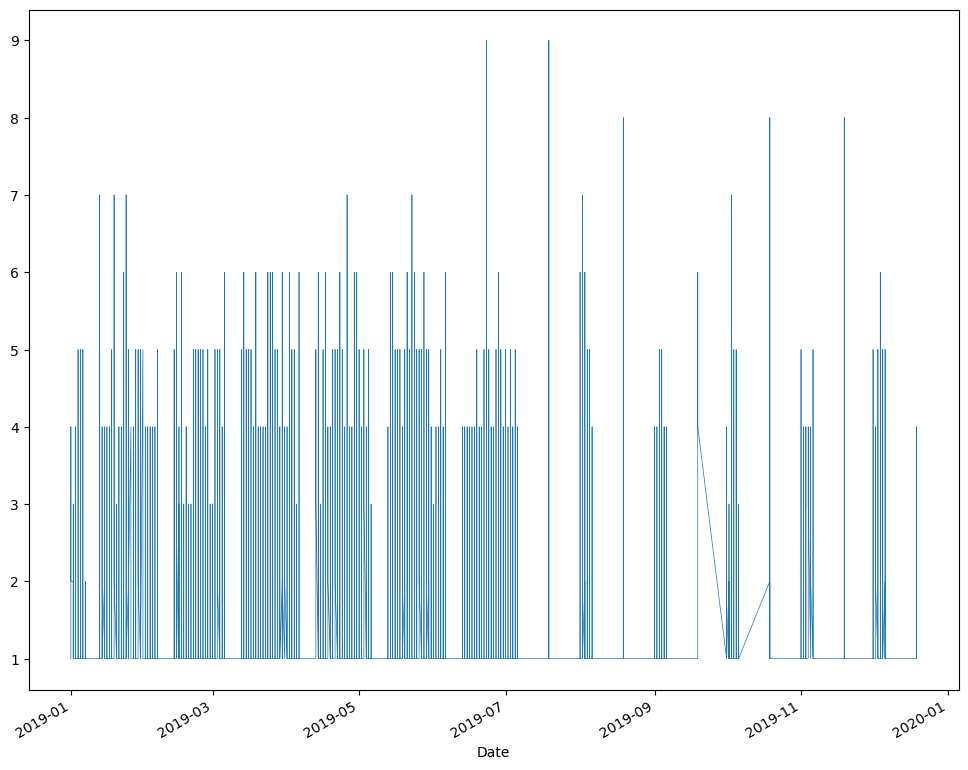

In [66]:
# Analysing the Total_Amount column

plt.figure(figsize = (12,10))
data_2019['Quantity_Ordered'].plot(linewidth = 0.5)

Text(0.5, 1.0, ' Total Revenue distribution within the year')

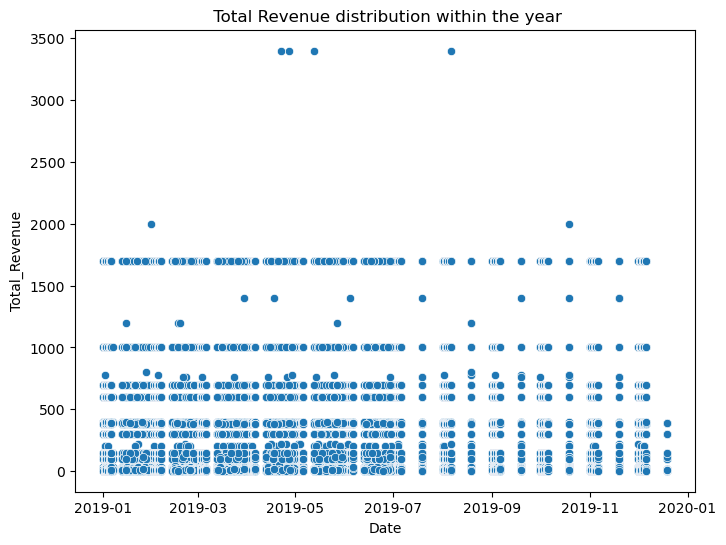

In [67]:

# RELATIONSHIP BETWEEN Total Amount AND Year

plt.figure(figsize=(8,6))
sns.scatterplot(data_2019['Total_Revenue'])
plt.title(' Total Revenue distribution within the year')

<Axes: xlabel='Product', ylabel='Total_Revenue'>

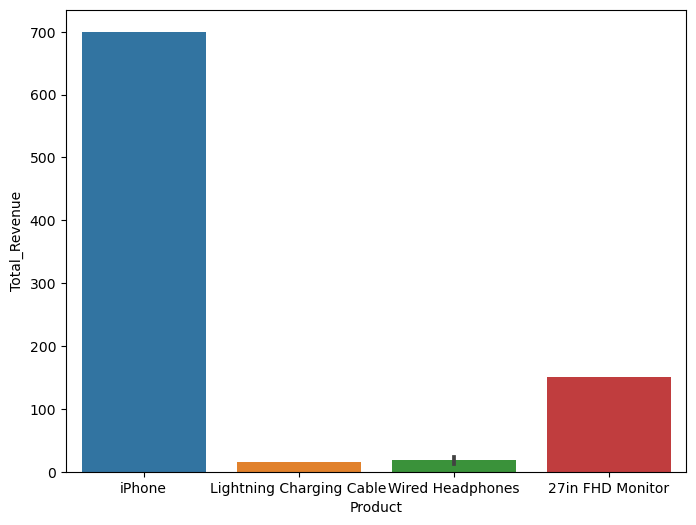

In [68]:
# Visiualizing the top 5 Products with the highest Total Amount
plt.figure(figsize = (8,6))
sns.barplot(data = data_2019.head(5), x ='Product', y ='Total_Revenue')

<Axes: >

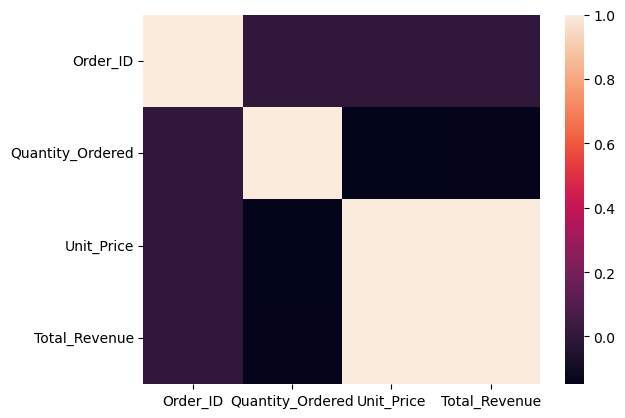

In [69]:
# Visualising the correlation with a heatmap

sns.heatmap(data_2019.corr())

<Axes: xlabel='Date'>

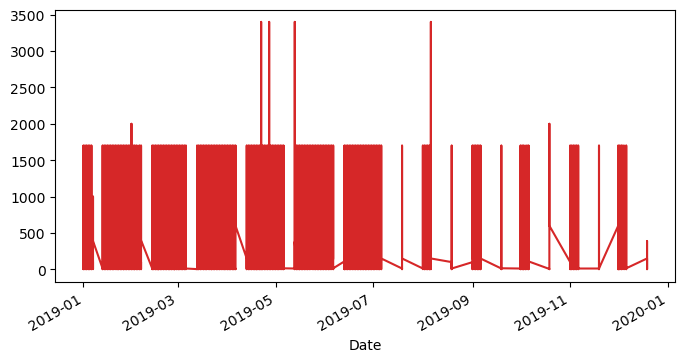

In [70]:
## Checking for seansonality in the dataset

data_2019['Total_Revenue'].plot(figsize=(8,4), color="tab:red")

In [71]:
#decompose_result = seasonal_decompose(data_2019['Month'], model="multiplicative")

#trend = decompose_result.trend

#seasonal = decompose_result.seasonal

#residual = decompose_result.resid

#decompose_result.plot();